In [1]:
import opendatasets as opd
import pandas as pd

In [3]:
opd.download("https://www.kaggle.com/datasets/arashnic/icd10-codes-and-descriptions/data",data_dir="/home/careinfolab/Dr_Luo/Rohan/ICD_Codes/Dataset")

Skipping, found downloaded files in "/home/careinfolab/Dr_Luo/Rohan/ICD_Codes/Dataset/icd10-codes-and-descriptions" (use force=True to force download)


In [4]:
df = pd.read_csv("/home/careinfolab/Dr_Luo/Rohan/ICD_Codes/Dataset/icd10-codes-and-descriptions/ICD10codes.csv")

In [5]:
df.head(10)

,A00,0,A000,"Cholera due to Vibrio cholerae 01, biovar cholerae","Cholera due to Vibrio cholerae 01, biovar cholerae.1",Cholera
0,A00,1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",Cholera
1,A00,9,A009,"Cholera, unspecified","Cholera, unspecified",Cholera
2,A010,0,A0100,"Typhoid fever, unspecified","Typhoid fever, unspecified",Typhoid fever
3,A010,1,A0101,Typhoid meningitis,Typhoid meningitis,Typhoid fever
4,A010,2,A0102,Typhoid fever with heart involvement,Typhoid fever with heart involvement,Typhoid fever
5,A010,3,A0103,Typhoid pneumonia,Typhoid pneumonia,Typhoid fever
6,A010,4,A0104,Typhoid arthritis,Typhoid arthritis,Typhoid fever
7,A010,5,A0105,Typhoid osteomyelitis,Typhoid osteomyelitis,Typhoid fever
8,A010,9,A0109,Typhoid fever with other complications,Typhoid fever with other complications,Typhoid fever
9,A011,NaN,A011,Paratyphoid fever A,Paratyphoid fever A,Paratyphoid fever A


# Data Analysis

### What are the most common ICD code group in the dataset?

In [4]:
cleaned_df = pd.read_csv('/home/careinfolab/Dr_Luo/Rohan/ICD_Codes/Dataset/icd10-codes-and-descriptions/Codes&Desc_cleaned.csv') 
cleaned_df['ICD_Block'] = cleaned_df['ICD_Code'].str.extract(r'(^[A-Z]\d{2})')
most_common_blocks = cleaned_df['ICD_Block'].value_counts()
print("Most common ICD blocks:")
print(most_common_blocks[:10])

Most common ICD blocks:
S82    3096
S52    2796
S72    2466
S62    1911
S42    1398
S92    1386
M84     928
S63     921
S32     846
T23     648
Name: ICD_Block, dtype: int64


### Is there repeated ICD Codes in the Dataset?

In [5]:
code_counts = cleaned_df['ICD_Code'].value_counts()
most_common_codes = code_counts[code_counts > 1]

if most_common_codes.empty:
    print("All ICD codes are unique in the dataset.")
else:
    print("Most common ICD codes:")
    print(most_common_codes)

All ICD codes are unique in the dataset.


### Which diagnoses/descriptions occur most frequently?

In [ ]:
description_counts = cleaned_df['Description'].value_counts()
print("Most frequent descriptions (exact matches):")
print(description_counts.head(10))  

Most frequent descriptions (exact matches):
cholera due to vibrio cholerae 01 biovar cholerae                                                                                                                                1
other fracture of lower end of unspecified tibia subsequent encounter for open fracture type i or ii with nonunion other fracture of lower end of unspecified tibia              1
unspecified fracture of shaft of right fibula initial encounter for closed fracture unspecified fracture of shaft of right fibula                                                1
other fracture of lower end of unspecified tibia sequela other fracture of lower end of unspecified tibia                                                                        1
other fracture of lower end of unspecified tibia subsequent encounter for open fracture type iiia iiib or iiic with malunion other fracture of lower end of unspecified tibia    1
other fracture of lower end of unspecified tibia subsequent e

### Are certain ICD codes more common in specific categories or chapters (like infectious diseases, neoplasms, etc.)?

In [7]:
def map_icd_to_chapter(code):
    code = code.upper()
    if code.startswith('A') or code.startswith('B'):
        return 'Infectious and parasitic diseases'
    elif code.startswith('C') or code.startswith('D0') or code.startswith('D4'):
        return 'Neoplasms'
    elif code.startswith('D5') or code.startswith('D8'):
        return 'Blood diseases'
    elif code.startswith('E'):
        return 'Endocrine, nutritional, and metabolic diseases'
    return 'Other'

cleaned_df['ICD_Category'] = cleaned_df['ICD_Code'].apply(map_icd_to_chapter)
category_counts = cleaned_df['ICD_Category'].value_counts()
print(category_counts)

Other                                             68266
Neoplasms                                          1344
Infectious and parasitic diseases                  1058
Endocrine, nutritional, and metabolic diseases      904
Blood diseases                                      132
Name: ICD_Category, dtype: int64


### What is the average length (in characters or tokens) of ICD codes and their descriptions?

In Characters

In [10]:
cleaned_df['ICD_Code_Length'] = cleaned_df['ICD_Code'].str.len()
cleaned_df['Description_Length'] = cleaned_df['Description'].str.len()

avg_code_length = cleaned_df['ICD_Code_Length'].mean()
avg_description_length = cleaned_df['Description_Length'].mean()

max_code_length = cleaned_df['ICD_Code_Length'].max()
max_description_length = cleaned_df['Description_Length'].max()

print(f"Average ICD Code Length (characters): {avg_code_length}")
print(f"Average Description Length (characters): {avg_description_length}")
print(f"Maximum ICD Code Length (characters): {max_code_length}")
print(f"Maximum Description Length (characters): {max_description_length}")


Average ICD Code Length (characters): 7.44489847149392
Average Description Length (characters): 125.58648053107218
Maximum ICD Code Length (characters): 8
Maximum Description Length (characters): 428


In Words

In [13]:
cleaned_df['Description_Words'] = cleaned_df['Description'].str.split().str.len()

avg_word_count = cleaned_df['Description_Words'].mean()
max_word_count = cleaned_df['Description_Words'].max()

print(f"Average Description Length (words): {avg_word_count}")
print(f"Maximum Description Length (words): {max_word_count}")

Average Description Length (words): 17.478327568894343
Maximum Description Length (words): 58


In Tokens

In [14]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_file("/home/careinfolab/Dr_Luo/Rohan/ICD_Codes/Notebook/bpe_tokenizer.json") 

def count_tokens(text):
    return len(tokenizer.encode(text).tokens)

cleaned_df['Description_Tokens'] = cleaned_df['Description'].apply(count_tokens)
max_token_count = cleaned_df['Description_Tokens'].max()
print(f"Maximum Description Length (BPE tokens): {max_token_count}")
avg_token_count = cleaned_df['Description_Tokens'].mean()

print(f"Average Description Length (BPE tokens): {avg_token_count}")


Maximum Description Length (BPE tokens): 60
Average Description Length (BPE tokens): 19.478327568894343


### Do longer descriptions correspond to more specific or rare ICD codes? 

In [15]:
code_counts = cleaned_df['ICD_Code'].value_counts()
cleaned_df['ICD_Code_Frequency'] = cleaned_df['ICD_Code'].map(code_counts)
correlation = cleaned_df['Description_Tokens'].corr(cleaned_df['ICD_Code_Frequency'])
print(f"Correlation between description length and ICD code frequency: {correlation}")

Correlation between description length and ICD code frequency: nan


### Which words/subwords occur most frequently across descriptions?

In [16]:
from collections import Counter

all_tokens = []
for description in cleaned_df['Description']:
    encoded = tokenizer.encode(description)
    all_tokens.extend(encoded.tokens)

token_counts = Counter(all_tokens)
most_common_tokens = token_counts.most_common(20) 
print("Most common tokens across all descriptions:")
for token, count in most_common_tokens:
    print(f"Token: '{token}' — Count: {count}")


Most common tokens across all descriptions:
Token: 'of' — Count: 134286
Token: '[SOS]' — Count: 71704
Token: '[EOS]' — Count: 71704
Token: 'fracture' — Count: 50829
Token: 'unspecified' — Count: 46433
Token: 'encounter' — Count: 36546
Token: 'other' — Count: 28542
Token: 'with' — Count: 28429
Token: 'left' — Count: 24169
Token: 'right' — Count: 23853
Token: 'and' — Count: 22371
Token: 'subsequent' — Count: 21845
Token: 'for' — Count: 17826
Token: 'initial' — Count: 14191
Token: 'in' — Count: 13859
Token: 'or' — Count: 13095
Token: 'sequela' — Count: 12062
Token: 'displaced' — Count: 10622
Token: 'nondisplaced' — Count: 10530
Token: 'injury' — Count: 8499


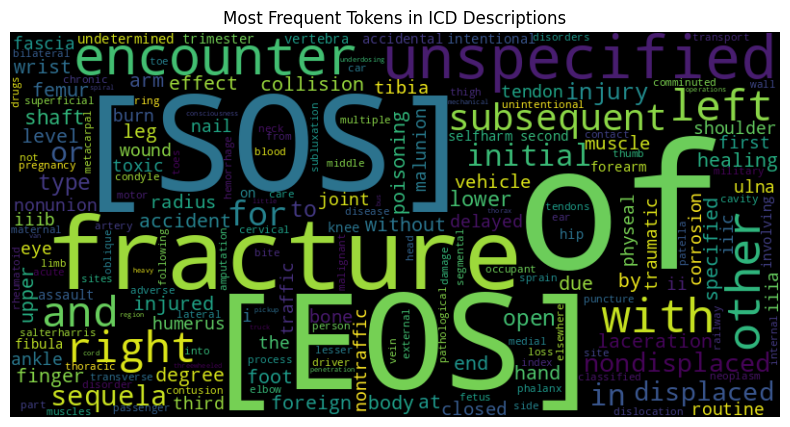

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(token_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Tokens in ICD Descriptions')
plt.show()


### How does token count vary across descriptions?

Minimum tokens: 3
Maximum tokens: 60
Average tokens: 19.48
Standard deviation: 8.01


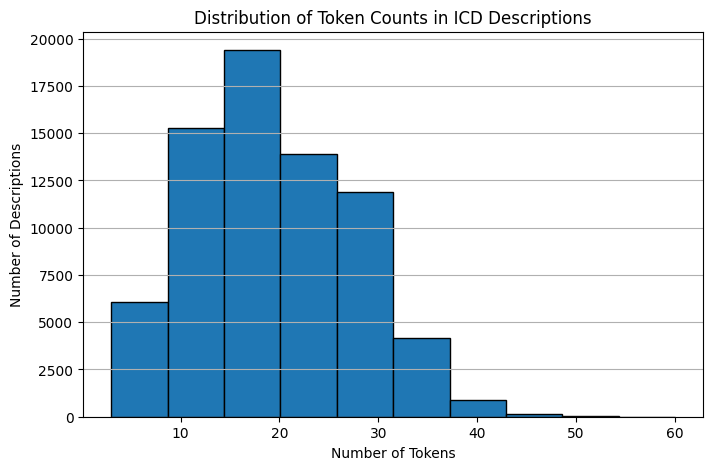

In [21]:
min_tokens = cleaned_df['Description_Tokens'].min()
max_tokens = cleaned_df['Description_Tokens'].max()
mean_tokens = cleaned_df['Description_Tokens'].mean()
std_tokens = cleaned_df['Description_Tokens'].std()

print(f"Minimum tokens: {min_tokens}")
print(f"Maximum tokens: {max_tokens}")
print(f"Average tokens: {mean_tokens:.2f}")
print(f"Standard deviation: {std_tokens:.2f}")

plt.figure(figsize=(8, 5))
plt.hist(cleaned_df['Description_Tokens'], bins=10, edgecolor='black')
plt.title('Distribution of Token Counts in ICD Descriptions')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Descriptions')
plt.grid(axis='y')
plt.show()


### What percentage of ICD codes or descriptions are broken into subwords by your BPE tokenizer?

In [23]:
def is_broken_into_subwords(text):
    return len(tokenizer.encode(text).tokens) > 1
cleaned_df['Code_Broken'] = cleaned_df['ICD_Code'].apply(is_broken_into_subwords)
cleaned_df['Desc_Broken'] = cleaned_df['Description'].apply(is_broken_into_subwords)
percent_codes_broken = cleaned_df['Code_Broken'].mean() * 100
percent_descs_broken = cleaned_df['Desc_Broken'].mean() * 100
print(f"Percentage of ICD Codes broken into subwords: {percent_codes_broken}%")
print(f"Percentage of Descriptions broken into subwords: {percent_descs_broken}%")

Percentage of ICD Codes broken into subwords: 100.0%
Percentage of Descriptions broken into subwords: 100.0%


### What are the longest/shortest sequences (by tokens)?

In [24]:
max_idx = cleaned_df['Description_Tokens'].idxmax()
min_idx = cleaned_df['Description_Tokens'].idxmin()

longest_desc = cleaned_df.loc[max_idx, 'Description']
longest_tokens = cleaned_df.loc[max_idx, 'Description_Tokens']
longest_code = cleaned_df.loc[max_idx, 'ICD_Code']

shortest_desc = cleaned_df.loc[min_idx, 'Description']
shortest_tokens = cleaned_df.loc[min_idx, 'Description_Tokens']
shortest_code = cleaned_df.loc[min_idx, 'ICD_Code']

print("Longest Description:")
print(f"ICD Code: {longest_code}")
print(f"Tokens: {longest_tokens}")
print(f"Text: {longest_desc}\n")

print("Shortest Description:")
print(f"ICD Code: {shortest_code}")
print(f"Tokens: {shortest_tokens}")
print(f"Text: {shortest_desc}")


Longest Description:
ICD Code: S06.816A
Tokens: 60
Text: injury of right internal carotid artery intracranial portion not elsewhere classified with loss of consciousness greater than 24 hours without return to preexisting conscious level with patient surviving initial encounter injury of right internal carotid artery intracranial portion not elsewhere classified with loss of consciousness greater than 24 hours without return to preexisting conscious level with patient surviving

Shortest Description:
ICD Code: A07.0
Tokens: 3
Text: balantidiasis
